In [45]:
import numpy as np 
import pandas as pd 
import os
import cv2

# labels

In [46]:
labels = os.listdir("habib_new_data/train")

In [47]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

# visualize random 1 image

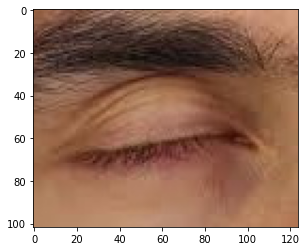

In [48]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("habib_new_data/train/Closed/_5.jpg"))

# image array

In [49]:
a = plt.imread("habib_new_data/train/yawn/10.jpg")

# image shape

In [50]:
a.shape

(480, 640, 3)

# visualize yawn image. 
# Here background is unnecessary. we need only face image array

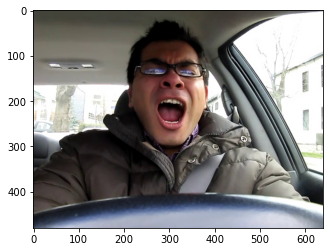

In [51]:
plt.imshow(plt.imread("habib_new_data/train/yawn/40.jpg"))

# for yawn and not_yawn. Take only face

In [52]:
def face_for_yawn(direc="habib_new_data/train", face_cas_path="pred_data/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


# for closed and open eye

In [53]:
def get_data(dir_path="habib_new_data/train/", face_cas="pred_data/haarcascade_frontalface_default.xml", eye_cas="pred_data/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [54]:
data_train = get_data()

2
3


# extend data and convert array

In [55]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

# new variable to store

In [56]:
new_data = append_data()

0
1
2
3


<ipython-input-55-be15ac3ad549>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


# separate label and features

In [57]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# reshape the array

In [58]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinarizer

In [59]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# label array

In [60]:
y = np.array(y)

# train test split

In [61]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# length of X_test

In [62]:
len(X_test)

578

# Not necessary, only use to matching with my pc version

In [65]:
!pip install tensorflow==2.3.1
!pip install keras==2.4.3

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Habib Python\\python_new\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.2
    Uninstalling numpy-1.23.2:
      Successfully uninstalled numpy-1.23.2
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you'll have keras 2.4.3 which is incompatible.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you'll have numpy 1.18.5 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you'll have tensorflow-estimator 2.3.0 which is incompatible.


# import some dependencies

In [66]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# tensorflow version

In [67]:
tf.__version__

'2.11.0'

# keras version

In [68]:
import keras
keras.__version__

'2.11.0'

# Data Augmentation

In [69]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [70]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

In [71]:
history = model.fit(train_generator, epochs=100, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/100
43/43 [==============================] - 113s 3s/step - loss: 1.2918 - accuracy: 0.4105 - val_loss: 1.0500 - val_accuracy: 0.6522
Epoch 2/100
43/43 [==============================] - 118s 3s/step - loss: 0.6030 - accuracy: 0.7520 - val_loss: 0.4680 - val_accuracy: 0.7820
Epoch 3/100
43/43 [==============================] - 110s 3s/step - loss: 0.4247 - accuracy: 0.8270 - val_loss: 0.2864 - val_accuracy: 0.8824
Epoch 4/100
43/43 [==============================] - 107s 2s/step - loss: 0.3597 - accuracy: 0.8434 - val_loss: 0.2672 - val_accuracy: 0.8893
Epoch 5/100
43/43 [==============================] - 105s 2s/step - loss: 0.2997 - accuracy: 0.8731 - val_loss: 0.2892 - val_accuracy: 0.8668
Epoch 6/100
43/43 [==============================] - 106s 2s/step - loss: 0.2892 - accuracy: 0.8782 - val_loss: 0.2220 - val_accuracy: 0.9048
Epoch 7/100
43/43 [==============================] - 106s 2s/step - loss: 0.2369 - accuracy: 0.9005 - val_loss: 0.1853 - val_accuracy: 0.9239
Epoch 

# history

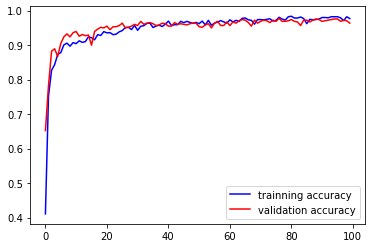

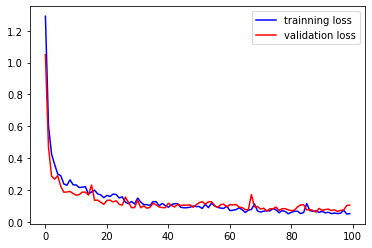

In [72]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# save model

In [73]:
model.save("drowiness_new6.h5")

In [74]:
model.save("drowiness_new6.model")

INFO:tensorflow:Assets written to: drowiness_new6.model\assets


INFO:tensorflow:Assets written to: drowiness_new6.model\assets


# Prediction

In [92]:
predict_x=model.predict(X_test) 
prediction=np.argmax(predict_x,axis=1)

19/19 [==============================] - 10s 523ms/step


In [93]:
prediction

array([3, 3, 2, 3, 1, 3, 3, 2, 0, 2, 3, 3, 3, 2, 2, 2, 3, 0, 0, 3, 0, 3,
       2, 0, 0, 2, 2, 2, 3, 2, 3, 2, 3, 2, 0, 3, 3, 2, 0, 3, 2, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 3, 0, 2, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 0, 3, 0, 3, 2, 0, 3, 2, 2, 2, 2, 1,
       3, 3, 2, 3, 2, 3, 1, 0, 3, 0, 3, 3, 3, 1, 3, 0, 2, 3, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 3, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 3,
       1, 3, 1, 2, 3, 3, 2, 0, 2, 2, 2, 1, 3, 3, 2, 3, 2, 0, 2, 3, 3, 3,
       3, 0, 1, 0, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 2,
       2, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 2, 0, 0, 3, 2, 2, 2, 3, 3, 0,
       3, 2, 3, 0, 2, 0, 0, 1, 2, 3, 2, 0, 3, 0, 2, 2, 2, 2, 1, 3, 1, 0,
       1, 0, 2, 3, 3, 3, 3, 0, 0, 2, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 0, 3, 2, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 2,
       2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 2, 3, 1,

In [94]:
y_test

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

# classification report

In [95]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [96]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(np.argmax(y_test, axis=1), classes_x, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.62      0.95      0.75        63
     no_yawn       0.87      0.54      0.67        74
      Closed       0.94      0.99      0.96       215
        Open       1.00      0.92      0.96       226

    accuracy                           0.90       578
   macro avg       0.86      0.85      0.84       578
weighted avg       0.92      0.90      0.90       578



# predicting function

In [98]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="pred_data/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

# Prediction 
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [103]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("habib_new_data/train/no_yawn/1067.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 75ms/step


1

<img src="habib_new_data/train/no_yawn/1067.jpg" height=30% width=30%>

In [100]:
prediction = model.predict([prepare("habib_new_data/train/Closed/_101.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 93ms/step


2

<img src="habib_new_data/train/Closed/_101.jpg" height=30% width=30%>

In [101]:
prediction = model.predict([prepare("habib_new_data/train/Open/_104.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 68ms/step


3

<img src="habib_new_data/train/Open/_104.jpg" height=30% width=30%>

In [102]:
prediction = model.predict([prepare("habib_new_data/train/yawn/113.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 81ms/step


3

<img src="habib_new_data/train/yawn/113.jpg" height=30% width=30%>

In [117]:
prediction = model.predict([prepare("yawn_closed.jpeg")])
np.argmax(prediction)

1/1 [==============================] - 0s 91ms/step


2

<img src="yawn_closed.jpeg" height=30% width=30%>

In [115]:
prediction = model.predict([prepare("closed_yawn.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 84ms/step


2

<img src="closed_yawn.jpg" height =30% width=30%>

In [113]:
prediction = model.predict([prepare("open_eye.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 87ms/step


3

<img src="open_eye.jpg" height=30% width=30%>